<p style="background-color:darkcyan;
          font-family:computermodern;
          color:white;
          font-size:400%;
          text-align:center;
          border-radius:10px 10px;
          ">Introduction to Fourier <br> Series and Transforms</p>
          
**Table of Contents:** <br>
[`1. Basic Fourier Series`](#BFS)<br>
[`2. Complex Representation of Fourier Series`](#CFS)<br>
[`3. Fourier Representation of Different Interval`](#FourierDiff_interval)<br>
[`4. Fourier Transforms`](#FourierTransforms)<br>
    
By [Math and Physics Fun With Gus](https://mathphysicsfunwithgus.square.site)
***
    

# 1 - Fourier Function Representation <a id="BFS"></a>
What is a Fourier seresis? In short, it is a method of representing periodic functions as a sum of sins and cosines.

\begin{align}
f(x) =& \frac{a_0}{2} + a_1\cos(x) + a_2\cos(2x) \ + \ ... \  + \ b_1\sin(x) + b_2\sin(2x) + \  ... \\
    =&\frac{a_0}{2}+ \sum_{n=1}^\infty \left( a_n \cos(nx) + b_n\sin(nx)\right)
\end{align}

### __Fourier Coefficients:__
\begin{equation}
a_0 = \frac{1}{\pi}\int_{-\pi}^{\pi}f(x)dx, \qquad\qquad
a_n = \frac{1}{\pi}\int_{-\pi}^{\pi}f(x)\cos\left(nx\right)dx, \qquad\qquad
b_n = \frac{1}{\pi}\int_{-\pi}^{\pi}f(x)\sin\left(nx\right)dx
\end{equation}
    

In [1]:
# General imports
import matplotlib.pyplot as plt
import numpy as np

# Symbolic math :)
from sympy import *
init_printing() # LaTeX output from SymPy


# Plot configurations
%config InlineBackend.figure_format = 'retina'
plt.rcParams.update({'font.size': 14}) 
plt.rcParams['figure.figsize'] = (13, 8)

# Fourier Series Plotter
def plot(x, y, f,
         title1=r'Plots of various $n$ in Fourier Series',
         title2=r'$f(x)$',
         x_axis=r'$x$', y_axis=r'$y_n(x)$', color='C0'):
    
    fig, ax = plt.subplots(1, 2, figsize=(14,4))
    
    ax[0].plot(x, y)
    ax[0].set_title(title1)
    ax[0].set_ylabel(y_axis)
    ax[0].set_xlabel(x_axis)
    ax[0].grid( alpha=0.25 )

    ax[1].plot(x, f, color)
    ax[1].set_title(r'$f(x) =$' + title2)
    ax[1].set_ylabel(r'$f(x)$')
    ax[1].set_xlabel(x_axis)
    ax[1].grid( alpha=0.25 )
    plt.show()
    

- Below bounds of integral is left as variables in case part of the function changes or is zero, for which there would be no need to integrate over that part of the function. Also note that $a_0$ is covered in $a_n$, when $n=0$.

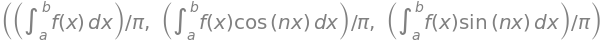

In [2]:
# Defining sympy variables and parameters
n = var('n', integer=True)
x, a, b = symbols('x, a, b')
f = Function('f')(x)
π = pi

a_0 = Integral( f , (x, a, b) ) / π
a_n = Integral( f * cos(n*x), (x, a, b) ) / π
b_n = Integral( f * sin(n*x), (x, a, b) ) / π

a_0, a_n, b_n

***
- $\textbf{Example 1}$ Expand in a Fourier series the function
$$f(x) = 
\begin{cases}
0, & -\pi < x < 0\\
1, & 0 < x < \pi
\end{cases}
$$

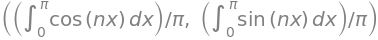

⎛                       ⎧        n                   ⎞
⎜                       ⎪1 - (-1)                    ⎟
⎜⎧0  for n > 0 ∨ n < 0  ⎪─────────  for n > 0 ∨ n < 0⎟
⎜⎨                    , ⎨   π⋅n                      ⎟
⎜⎩1      otherwise      ⎪                            ⎟
⎜                       ⎪    0          otherwise    ⎟
⎝                       ⎩                            ⎠

In [3]:
"""
Here .subs([]) replaces the variables to values. The .doit() evaluates the integral 
and .simplify() simplfies the expression. The function is 0 except for 0 < x < π thus
we only have to integrate over that domain.
"""
display(( a_n.subs( [(f, 1), (a, 0), (b, π)] ),
          b_n.subs( [(f, 1), (a, 0), (b, π)] ) ))

# The function is odd so a_n=0 except for a_0=1
display(( a_n.subs( [(f, 1), (a, 0), (b, π)] ).doit().simplify(), 
          b_n.subs( [(f, 1), (a, 0), (b, π)] ).doit().simplify()  ))
# so for even we get that b_n=0 and odd b_n=2/(nπ)

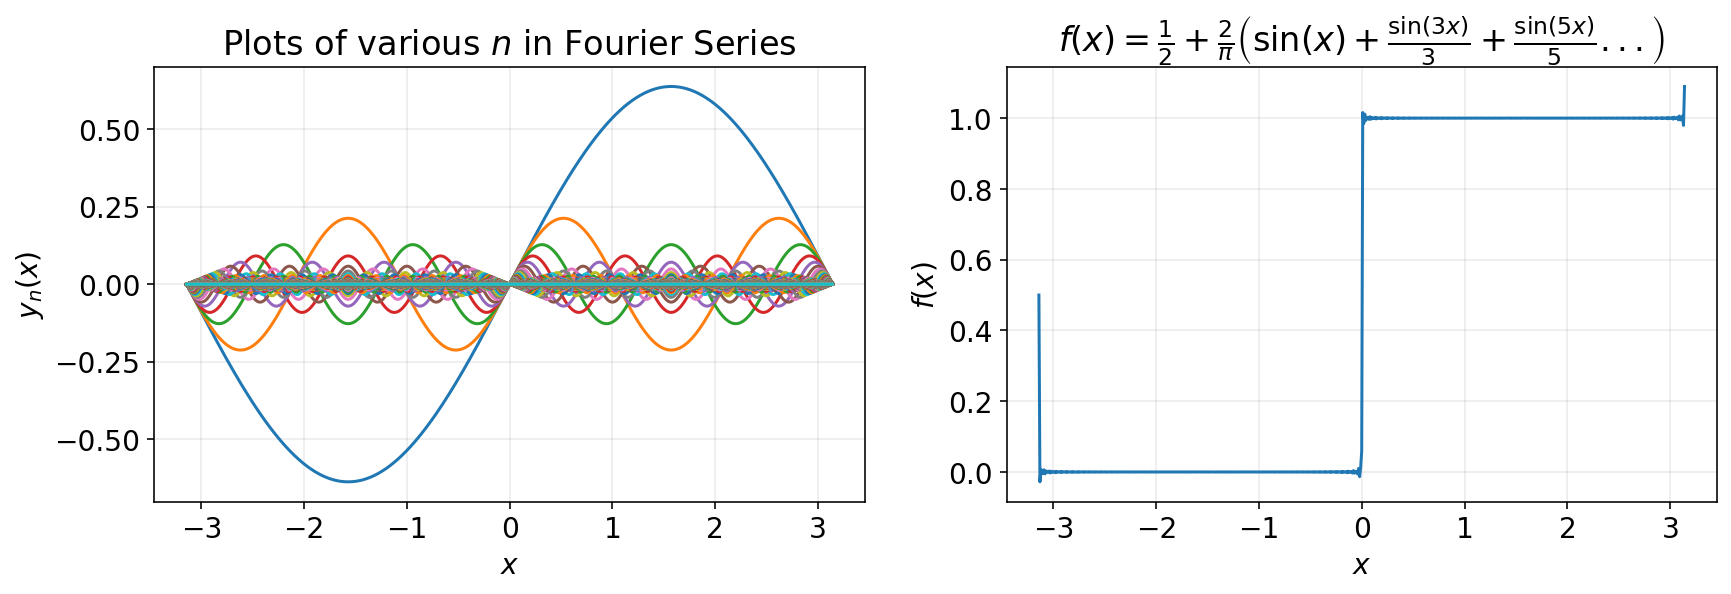

In [4]:
# getting summation
n = np.arange(1, 1000, 2)            # sin(nx) where n is odd, this increase by 2
x = np.arange(-np.pi, np.pi, 0.01 )
y = np.zeros( (len(x), len(n)) )
f = np.zeros( len(x) )

# composes each function decomposed for various values of x
for i in range( len(n) ):   
    for j in range( len(x) ):
        y[j, i] = 2 * ( np.sin(n[i] * x[j]) / n[i] ) / np.pi
    
# sums the functions creating the Fourier Series
for i in range( len(x) ):
    f[i] = 1/2 + np.sum( y[i, :] )  # 1/2 comes from a_0

# plotting
FS_Title = r'$\frac{1}{2}+\frac{2}{\pi}\left(\sin(x) + \frac{\sin(3x)}{3} + \frac{\sin(5x)}{5} ...\right)$'
plot(x, y, f, title2=FS_Title)

***
# 2 - Complex Representation of Fourer Series <a id="CFS"></a>

__Complex Fourier Function Representation__
\begin{equation}
f(x)=  \sum_{n=-\infty}^{n=+\infty} c_n e^{inx} = c_0 + c_1e^{ix} + c_{-1}e^{-ix} + c_2e^{2ix} + c_{-2}e^{-2ix} + ...\\
\end{equation}


__Complex Fourier Coefficients__
\begin{equation}
c_0 = \frac{1}{2\pi}\int_{-\pi}^{\pi}f(x)dx, \qquad\qquad
c_n = \frac{1}{2\pi}\int_{-\pi}^{\pi}f(x)e^{-inx}dx
\end{equation}
For real $f(x)$, $c_{-n}=\bar{c}_n$


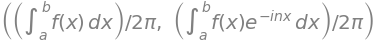

In [5]:
n = var('n', integer=True)
x, a, b = symbols('x, a, b')
f = Function('f')(x)

c_0 = Integral( f , (x, a, b) ) / (2 * π)         # due to bounds; covered when n=0 for c_n–>c_0
c_n = Integral( f * exp(-I*n*x), (x, a, b) ) / (2 * π)

c_0, c_n

- Repeating **example 1** using complex notation

In [6]:
# Substituting the above step function in to c_n above
c_n.subs( [(f, 1), (a, 0), (b, π)] ).doit().simplify()

⎧  ⎛    n    ⎞                   
⎪ⅈ⋅⎝(-1)  - 1⎠                   
⎪─────────────  for n > 0 ∨ n < 0
⎨    2⋅π⋅n                       
⎪                                
⎪     1/2           otherwise    
⎩                                

***

# 3 - Fourier Function Representation of Different Interval  <a id="FourierDiff_interval"></a>

Consider intervals of length $2\ell$, say ($-\ell, \ell$) or ($0, 2\ell$)

\begin{equation}
f(x) = \frac{a_0}{2} 
+ \sum_{n=1}^{\infty}a_n\cos\left(\frac{n\pi x}{\ell}\right) 
+ \sum_{n=1}^{\infty}b_n\sin\left(\frac{n\pi x}{\ell}\right)
=  \sum_{n=-\infty}^{+\infty} c_n e^{in\pi x/\ell}
\end{equation}

<br>


$\textbf{Fourier Coefficients Different Interval}$

\begin{align}
a_n = \frac{1}{\ell}\int_{-\ell}^{\ell}f(x)\cos\left(\frac{n\pi x}{\ell}\right)dx, \qquad & \qquad
b_n = \frac{1}{\ell}\int_{-\ell}^{\ell}f(x)\sin\left(\frac{n\pi x}{\ell}\right)dx\\  
\\
c_n = \frac{1}{2\ell}\int_{-\ell}^{\ell}f(x) & e^{-in\pi x/\ell}dx  \\
\end{align}

For the basic interval $(0, 2\ell)$ we need only change the integration limits to $0$ to $2\ell$. The Dirichlet theorem just needs $\pi$ replaced by $\ell$ in order to apply here.

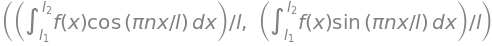

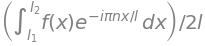

In [7]:
n = var('n', integer=True)
x, l, l1, l2 = symbols('x, l, l_1, l_2')
f = Function('f')(x)
           
a_n = Integral( f * cos( n*pi*x/l ), (x, l1, l2) ) / l
b_n = Integral( f * sin( n*pi*x/l ), (x, l1, l2) ) / l

display(( a_n, b_n  ))

# Or using complex notation
c_n =  Integral( f * exp(-I*n*pi*x/l), (x, l1, l2) ) / (2*l)
c_n

***
- $\textbf{Example 2}$
Compute and plot the following functions on the interval (-1, 1) and expand it in an appropriate Fourier series.
$$\begin{cases}
x+x^2, & -1<x<0\\
x-x^2, & 0<x<1
\end{cases}$$

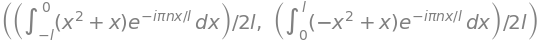

⎧    ⎛    n    ⎞                   
⎪2⋅ⅈ⋅⎝(-1)  - 1⎠                   
⎪───────────────  for n > 0 ∨ n < 0
⎨      3  3                        
⎪     π ⋅n                         
⎪                                  
⎩       0             otherwise    

In [8]:
c_nL = Integral( f * exp(-I*n*pi*x/l), (x, -l, 0) ).subs( f, x + x**2 ) / (2*l)
c_nR = Integral( f * exp(-I*n*pi*x/l), (x,  0, l) ).subs( f, x - x**2 ) / (2*l)

display(( c_nL, c_nR ))
(c_nL + c_nR).subs( l , 1 ).doit().simplify()

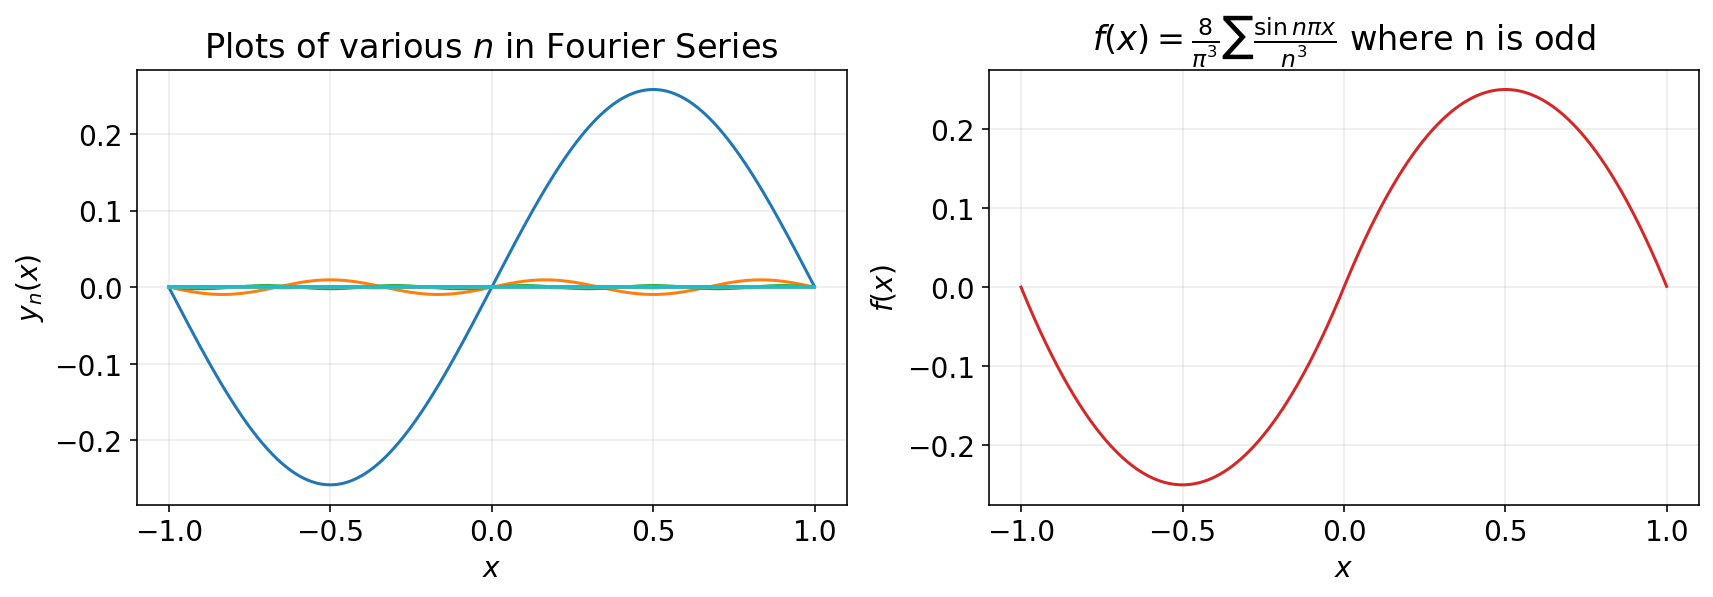

In [9]:
# getting summation
l = 1

n = np.arange(1, 100, 2)   # where n is odd
x = np.arange(-l, l, 0.001)
y = np.zeros( (len(x), len(n)) )
f = np.zeros( len(x) )

# composes each function decomposed for various values of x
for i in range( len(n) ):      
    for j in range( len(x) ):
        y[j, i] = 8 / np.pi ** 3 * ( np.sin(n[i] * np.pi * x[j]) / n[i] ** 3 )
        
# sums the functions creating the Fourier Series
for i in range( len(x) ):
    f[i] = np.sum( y[i, :] )

# plotting
FS_Title = r'$\frac{8}{\pi^3}\sum \frac{\sin n\pi x}{n^3}$ where n is odd'
plot(x, y, f, title2=FS_Title, color='C3')

***
- $\textbf{Example 3}$ Represent the following piecewise function as a fourier series.
$$
\begin{cases}
f(t) = F_0 \left( - 1 + \frac{4t}{T} )\right), & 0 \le t \le \frac{T}{2} \\
f(t) = F_0 \left( 3 - \frac{4t}{T} )\right), &  \frac{T}{2} \le t \le  T
\end{cases}
$$

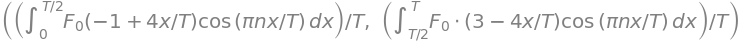

⎧     ⎛      n        ⎛π⋅n⎞    ⎞                   
⎪4⋅F₀⋅⎜- (-1)  + 2⋅cos⎜───⎟ - 1⎟                   
⎪     ⎝               ⎝ 2 ⎠    ⎠                   
⎪───────────────────────────────  for n > 0 ∨ n < 0
⎨              2  2                                
⎪             π ⋅n                                 
⎪                                                  
⎪               0                     otherwise    
⎩                                                  

In [10]:
T, F, x = symbols(r'T, F_0, x')
f = Function('f')(x)
n = var('n', integer=True) # if want nonzero n (nonzero=True)

a_nL = Integral( (F * ( - 1 + 4 * x / T)) * cos( n*pi*x/T ), (x, 0, T/2)) / T
a_nR = Integral( (F * ( 3 - 4 * x / T)) * cos( n*pi*x/T ), (x, T/2, T)) / T

Fa = a_nL + a_nR

display(( a_nL, a_nR ))
Fa.doit().simplify()

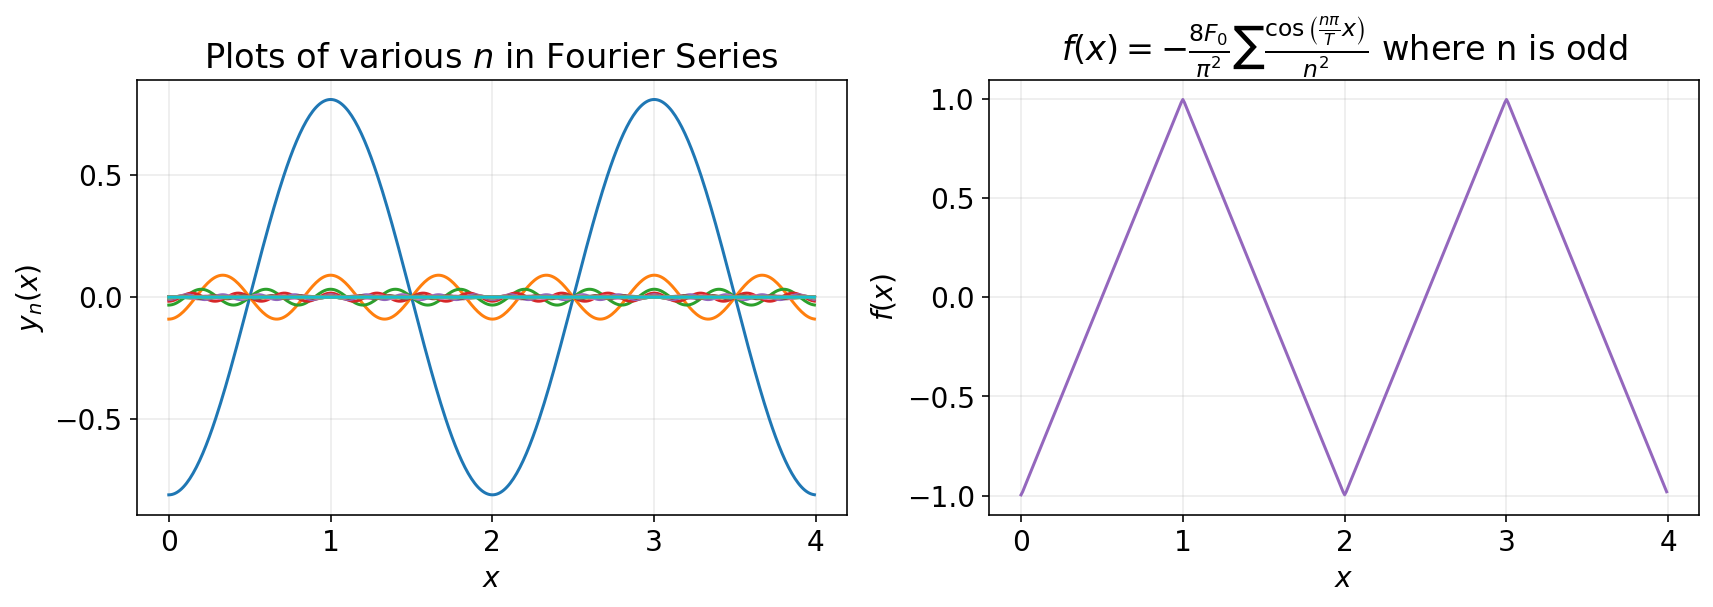

In [11]:
# getting summation
T = 1
F_0 = 1

n = np.arange(1, 100, 2) # odd n
x = np.arange(0, 4*T, 0.01)

y = np.zeros( (len(x), len(n)) )
f = np.zeros( len(x) )

# composes each function decomposed for various values of x
for i in range( len(n) ):
             
    for j in range( len(x) ):
        
        y[j, i] = - 8 * F_0 / (pi * n[i]) ** 2 *( np.cos(n[i] * np.pi * x[j] / T) )
        
# sums the functions creating the Fourier Series
for i in range( len(x) ):
    f[i] = np.sum(y[i, :])

# plotting
FS_Title = r'$- \frac{8F_0}{\pi^2}\sum \frac{\cos\left(\frac{n\pi}{T}x\right)}{n^2}$ where n is odd'
plot(x, y, f, title2=FS_Title, color='C4')

***
- $\textbf{Example 4}$
A violin string is plucked, find a formula $f(x,t)$ for the displacement at time $t$ of any point $x$ of the vibrating string. To solve this problem we need to expand the function $f(x,t=0)$, whose graph is the initial shape of the string, in a Fourier series. Find this series if a string of length $\ell$ is pulled aside a small distance $h$ at its centen.

$$ f(x,t=0) = 
\begin{cases}
\frac{2h}{\ell}x & 0<x<\frac{\ell}{2}\\
2h\left(1-\frac{x}{\ell}\right) & \frac{\ell}{2}<x<\ell
\end{cases}
$$

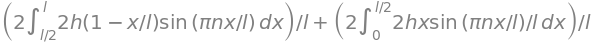

⎧       ⎛π⋅n⎞                   
⎪8⋅h⋅sin⎜───⎟                   
⎪       ⎝ 2 ⎠                   
⎪────────────  for n > 0 ∨ n < 0
⎨    2  2                       
⎪   π ⋅n                        
⎪                               
⎪     0            otherwise    
⎩                               

In [12]:
n = var('n', integer=True) # if want nonzero n (nonzero=True)
h, l, x = symbols('h, l, x')
f = Function('f')(x)

b_nL = 2 / (l) * Integral( f * sin( n*pi*x/l ), (x, 0, l/2) ).subs( f , 2*h*x/l )
b_nR = 2 / (l) * Integral( f * sin( n*pi*x/l ), (x, l/2, l) ).subs( f , 2*h*(1 - x/l) )

FC = b_nL + b_nR
display( FC )

display( FC.doit().simplify() )

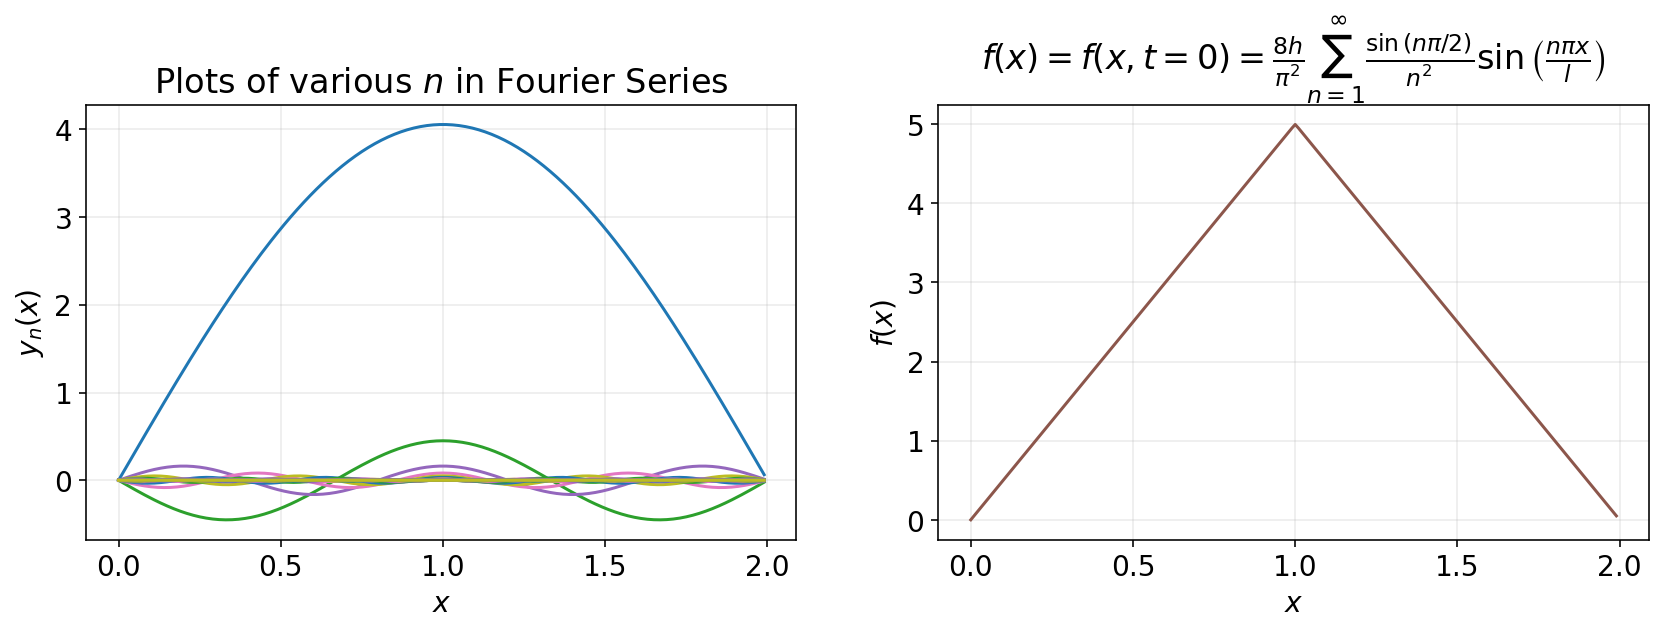

In [13]:
# getting summation
h = 5
l = 2

n = np.arange(1, 500, 1)
x = np.arange(0 , l, 0.01)

y = np.zeros( (len(x), len(n)) )
f = np.zeros( len(x) )

# composes each function decomposed for various values of x
for i in range( len(n) ):     
    for j in range( len(x) ):
        y[j, i] = 8 * h / np.pi ** 2 * (np.sin(n[i] * np.pi / 2) / n[i]**2 ) * np.sin( n[i] * np.pi * x[j] / l)
        
# sums the functions creating the Fourier Series
for i in range( len(x) ):
    f[i] = np.sum( y[i, :] )

# plotting
FS_Title = r'$f(x,t=0)=\frac{8h}{\pi^2}\sum_{n=1}^\infty\frac{\sin\left(n\pi/2\right)}{n^2}\sin\left(\frac{n\pi x}{l}\right)$'
plot(x, y, f, title2=FS_Title, color='C5')

***
- $\textbf{Example 5}$ Find the harmonic content of a signal; what frequencies it contains and in what proportions. Expand in a Fourier series. Assume in each case that the part of the graph shown is repeated sixty times per second.

$f(t) = \begin{cases}
1200t & 0<x<\frac{1}{120}\\
0 & \frac{1}{120} <x<\frac{1}{60}
\end{cases}$

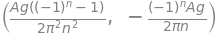

In [14]:
t, A, g = symbols('t, A, g')
n = var('n', integer=True, nonzero=True) # if want nonzero n (nonzero=True)
f = Function('f')(t)

a_n = 2 / (g) * Integral( f * cos( 2*n*pi*t/g ), (t, 0, g/2) ).subs( f, A*t )  # covered when n=0 for a_n –> (a_0)
b_n = 2 / (g) * Integral( f * sin( 2*n*pi*t/g ), (t, 0, g/2) ).subs( f, A*t )

a_n.doit().simplify(), b_n.doit()

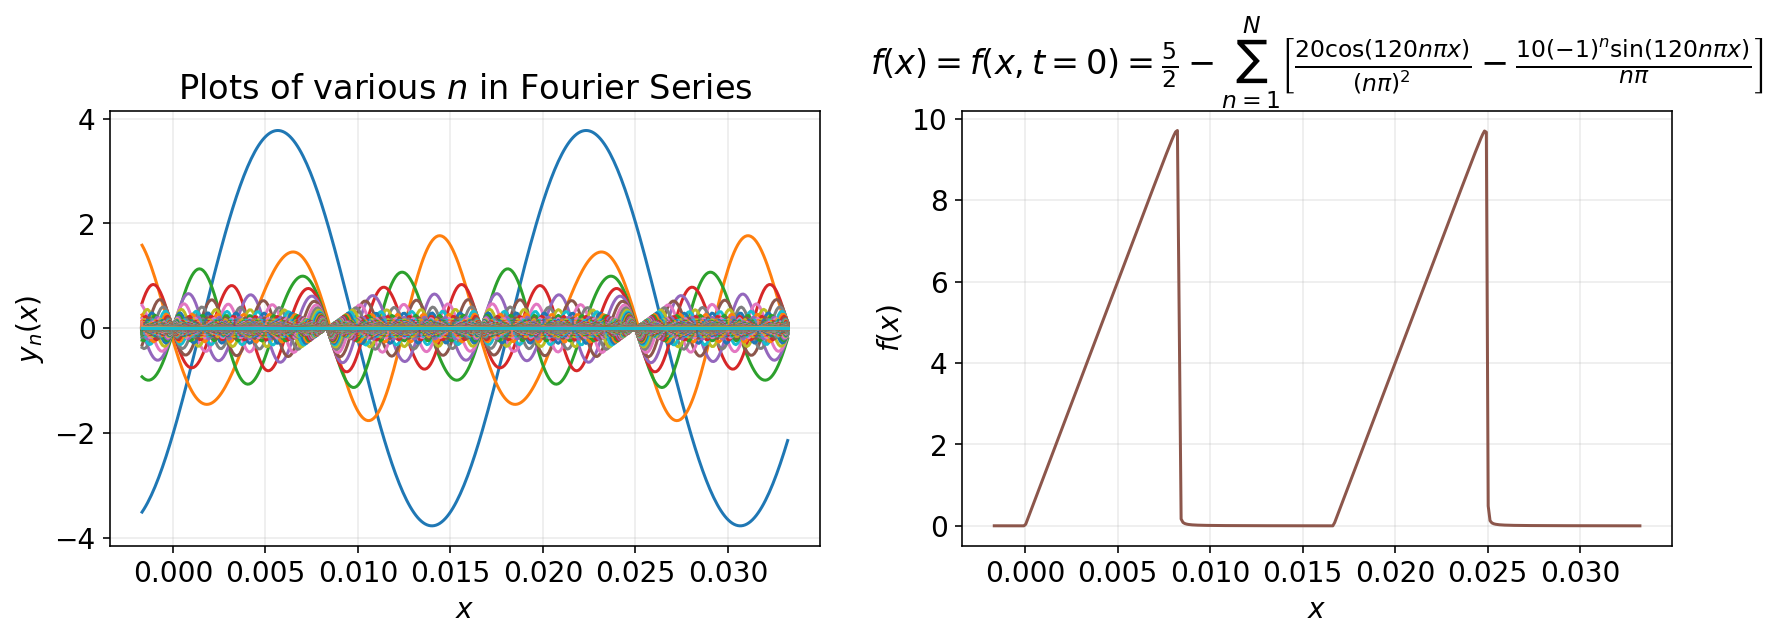

In [15]:
# getting summation
g = 1/60
n_o = np.arange(1, 1000, 2)
n = np.arange(1, 501, 1)
x = np.arange(- g / 10 , 2 * g , 0.0001)
y = np.zeros( (len(x), len(n)) )
f = np.zeros( len(x) )

# composes each function decomposed for various values of x
for i in range( len(n) ):        
    for j in range( len(x) ):
        c_in = 120 * n_o[i] * np.pi * x[j]
        s_in = 120 * n[i] * np.pi * x[j]
        y[j, i] = -20*np.cos(c_in)/(n_o[i]*np.pi)**2 - 10*(-1)**n[i]*np.sin(s_in)/(np.pi*n[i])
        
# sums the functions creating the Fourier Series
for i in range( len(x) ):
    f[i] = 5 / 2 + np.sum( y[i, :] )

# plotting
FS_Title = (r'$f(x, t=0) = \frac{5}{2} - \sum_{n=1}^N \left[ '
            r'\frac{20\cos(120 n \pi x)}{(n\pi)^2} - '
            r'\frac{10(-1)^n \sin(120 n \pi x)}{n \pi} \right]$')
plot(x, y, f, title2=FS_Title, color='C5')

***
# 4 - Fourier Transforms <a id="FourierTransforms"></a>

$\textbf{Definition of Fourier Transforms}$
\begin{equation}
\nonumber\\
f(x)  = \int_{-\infty}^\infty g(\alpha) e^{i \alpha x}d\alpha, \qquad\qquad 
g(\alpha) = \frac{1}{2\pi}\int_{-\infty}^{\infty}f(x)e^{-i\alpha x}dx
\end{equation}
<br>

$\textbf{Fourier Sine Transforms }$ We define $f_s(x)$ and $g_s(\alpha)$, a pair of $\texttt{Fourier sine transforms representing odd functions}$, by the equations
\begin{equation}
\nonumber\\
f_s(x)  = \sqrt{\frac{2}{\pi}}\int_{0}^\infty g_s(\alpha) \sin (\alpha x)d\alpha,
\qquad\qquad
g_s(\alpha) = \sqrt{\frac{2}{\pi}}\int_{0}^\infty f_s(x) \sin (\alpha x)dx 
\end{equation}
<br>

$\textbf{Fourier Cosine Transforms }$ We define $f_c(x)$ and $g_c(x)$, a pair of $\texttt{Fourier cosine transforms representing even functions}$, by the equations
\begin{equation}
\nonumber\\
f_c(x)  = \sqrt{\frac{2}{\pi}}\int_{0}^\infty g_c(\alpha) \cos (\alpha x)d\alpha,
\qquad\qquad
g_c(\alpha) = \sqrt{\frac{2}{\pi}}\int_{0}^\infty f_c(x) \cos (\alpha x)dx
\end{equation}

***
- $\textbf{Example 6}$ Find the exponential Fourier transform of the given $f(x)$ and write $f(x)$ as a Fourier integral [that is, find $g(\alpha)$.

it is clear that our function is 
$f(x) = 
\begin{cases}
2(a + x) & x \in [-a,0]  \\
2(a -x) & x \in [0,a]
\end{cases}
$

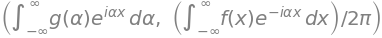

In [16]:
x, al = symbols(r'x, \alpha')
f = Function('f')(x)
g = Function('g')(al)

f_x  = Integral( g * exp( I * al * x) , ( al , - oo , oo ) )
g_al = 1/(2*pi) * Integral( f * exp( - I * al * x) , ( x , - oo , oo ) )

display(( f_x , g_al ))

In [17]:
a = Symbol('a')
g_al_ma = 1/(2*pi) * Integral( f * exp( - I * al * x) , ( x , - a , 0 ) ).subs( f , 2*(a+x) )
g_al_pa = 1/(2*pi) * Integral( f * exp( - I * al * x) , ( x , 0 , a ) ).subs( f , 2*(a-x) )

g_func = ((g_al_ma + g_al_pa).doit())
display( g_func.simplify() ) # which simplifies to 2/π (1 - cos(al a))/al^2

⎧⎛   2⋅ⅈ⋅\alpha⋅a      ⅈ⋅\alpha⋅a    ⎞  -ⅈ⋅\alpha⋅a                           
⎪⎝- ℯ             + 2⋅ℯ           - 1⎠⋅ℯ                                      
⎪──────────────────────────────────────────────────  for (\alpha > -∞ ∨ \alpha
⎪                            2                                                
⎪                    π⋅\alpha                                                 
⎨                                                                             
⎪                         2                                                   
⎪                        a                                                    
⎪                        ──                                                   
⎪                        π                                                    
⎩                                                                             

                                                                              
                                                   

Which simplifies to $\frac{2}{\pi\alpha^2} (1 - \cos(\alpha a))$

<p style="padding: 10px;
          background-color: yellow;
          font-family: computermodern;
          color: black;
          font-size: 210%;
          text-align: center;
          border-radius:20px 20px;
          ">Thank you and if you found this useful please like 👍🏼 </p>



---